# Perform hierarchical clustering on iris.csv

In [17]:
#Clustering of iris data

#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [5]:
#Reading data set
iris = pd.read_csv("iris.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


C:\Users\assi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\assi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\assi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

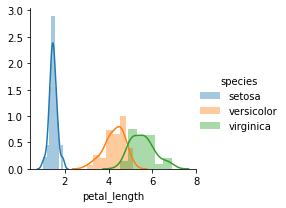

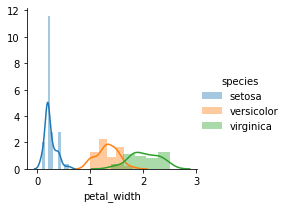

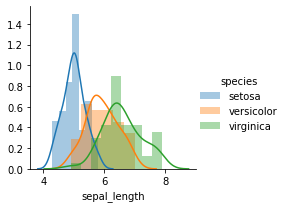

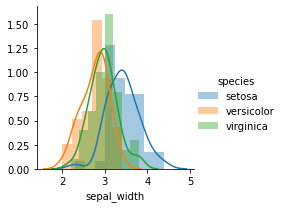

In [12]:
#Histograms of flower attributes
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.distplot,"sepal_width").add_legend()
plt.show()

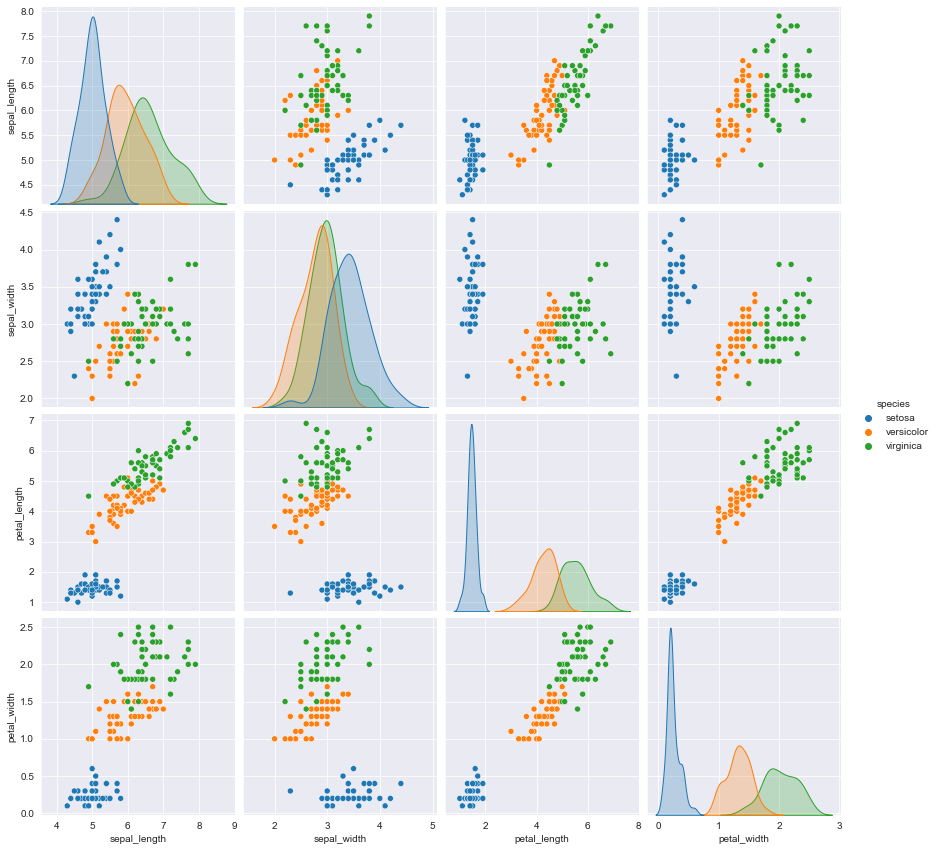

In [13]:
#Visualizing data distribution
#Scatter plot of features according to species
sns.set_style("darkgrid")
sns.pairplot(iris, hue="species", height=3);
plt.show()

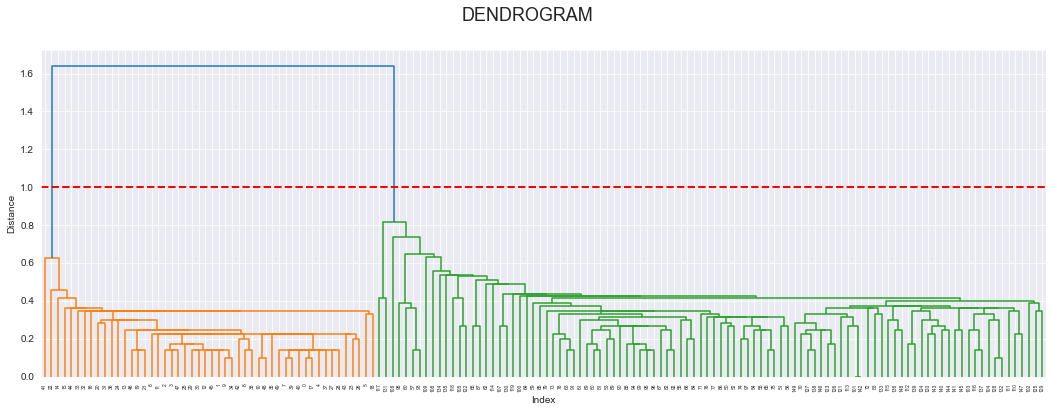

In [16]:
#Draw dendograms
X = iris.loc[:,["sepal_length","sepal_width","petal_length","petal_width"]]
#Try different types of linkage method
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM",fontsize=18)

# Add horizontal line at a given distance
plt.axhline(y=1.0, c='red', lw=2, linestyle='dashed')

plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


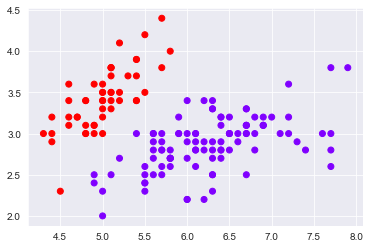

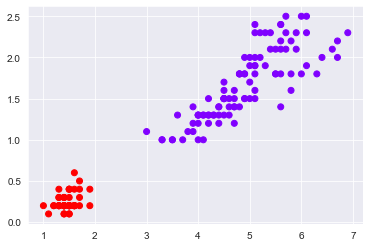

In [21]:
#Apply the HAC algorithm
#Number of clusters : 2
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                  linkage='single')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters
#Plot sepal length and sepal width
data = X.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()
#Plot petal length and petal width
data = X.iloc[:, 2:4].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


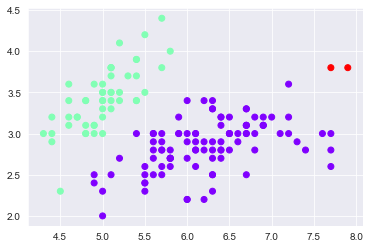

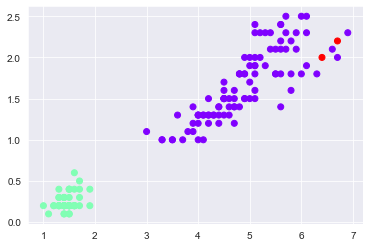

In [22]:
#Apply the HAC algorithm
#Number of clusters : 3
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', 
                                  linkage='single')
cluster.fit_predict(X)
print(cluster.labels_)

#Plot the clusters
#Plot sepal length and sepal width
data = X.iloc[:, 0:2].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()
#Plot petal length and petal width
data = X.iloc[:, 2:4].values
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.show()

In [23]:
#Evaluation of hierarchical clustering

#Add hierarchical clustering result to data set
from scipy.cluster.hierarchy import fcluster
iris_HAC = iris.copy()

#fcluster : forms flat clusters from the hierarchical clustering 
#defined by the given linkage matrix
iris_HAC['K=2'] = fcluster(dist_sin, 2, criterion='maxclust')
iris_HAC['K=3'] = fcluster(dist_sin, 3, criterion='maxclust')
iris_HAC.head()

,sepal_length,sepal_width,petal_length,petal_width,species,K=2,K=3
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


<AxesSubplot:title={'center':'Species'}, xlabel='petal_length', ylabel='petal_width'>

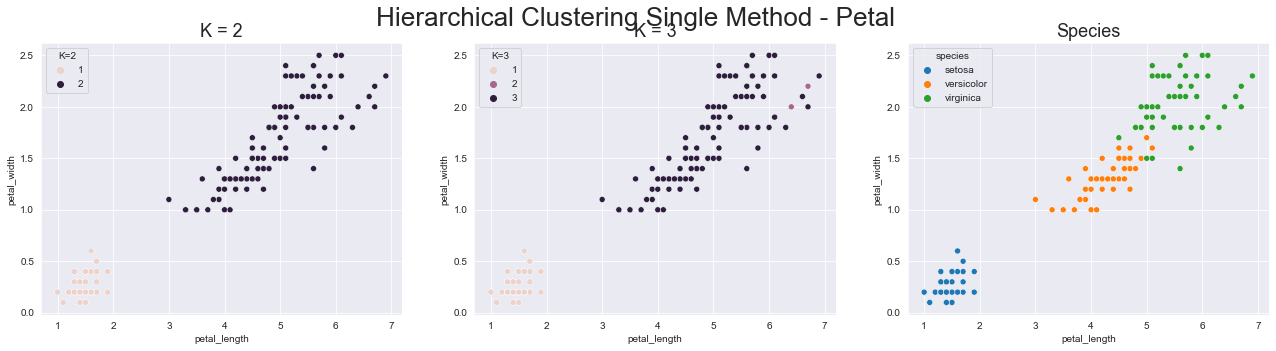

In [31]:
plt.figure(figsize=(22,5))

plt.suptitle("Hierarchical Clustering Single Method - Petal",fontsize=26)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=18)
sns.scatterplot(x="petal_length",y="petal_width", data=iris_HAC, hue="K=2")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=18)
sns.scatterplot(x="petal_length",y="petal_width", data=iris_HAC, hue="K=3")

plt.subplot(1,3,3)
plt.title("Species",fontsize=18)
sns.scatterplot(x="petal_length",y="petal_width", data=iris_HAC, hue="species")